In [1]:
import json
import time

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

pd.set_option('display.max_rows', 100)

In [2]:
import pickle
import glob

base_path = os.path.dirname(os.getcwd())
master_data_path = os.path.abspath(os.path.join(base_path,'master-data'))
data_path = os.path.abspath(os.path.join(base_path,'data'))
images_path = os.path.abspath(os.path.join(base_path,'dm-final-report', 'images'))   
# tsv_files = glob.glob(os.path.join(master_data_path,"*.tsv.gz"))

# for file in tsv_files:
#     print(file)
#     pickle.dump(pd.read_table(file,sep="\t",low_memory=False, na_values=["\\N","nan"]),
#                 open(file[:-7]+".sav","wb"))

In [ ]:
title_basics_crew_principals_ratings_merged_df = pd.read_pickle(os.path.join(data_path,"title.basics.crew.principals.ratings.cleaned.sav"))
title_principals_df = pd.read_pickle(os.path.join(data_path,"title.principals.cleaned.sav"))
name_basics_original_df = pd.read_pickle(os.path.join(master_data_path,"name.basics.sav"))

# TOSCA Clustering

In [3]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA

In [4]:
# read df_read_for_kmeans

df_read_for_kmeans = pd.read_pickle(os.path.join(data_path,"df_read_for_kmeans.sav"))
df_read_for_kmeans

,tconst,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,actor_score,actress_score,director_score,writer_score
0,tt0000009,False,1894,45,Romance,5.3,209,0.281154,0.238934,0.238965,0.238943
1,tt0000574,False,1906,70,"Action,Adventure,Biography",6.0,876,0.277972,0.277972,0.278103,0.278007
21,tt0000591,False,1907,90,Drama,5.5,23,0.266678,0.250004,0.250007,0.233341
23,tt0000941,False,1909,45,Drama,4.6,28,0.250931,0.200005,0.212971,0.276668
25,tt0001184,False,1910,58,"Adventure,Drama",3.8,22,0.216671,0.155559,0.212971,0.216674
...,...,...,...,...,...,...,...,...,...,...,...
634466,tt9916190,False,2020,95,"Action,Adventure,Thriller",3.6,255,0.283365,0.144500,0.144538,0.172270
634467,tt9916270,False,2020,84,Thriller,5.8,1475,0.292735,0.282253,0.233734,0.267053
634469,tt9916362,False,2020,92,"Drama,History",6.4,5754,0.291351,0.306038,0.276346,0.301511
634470,tt9916538,False,2019,123,Drama,8.6,7,0.343074,0.337452,0.307609,0.347330


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import plotly.figure_factory as ff



(49999, 4)


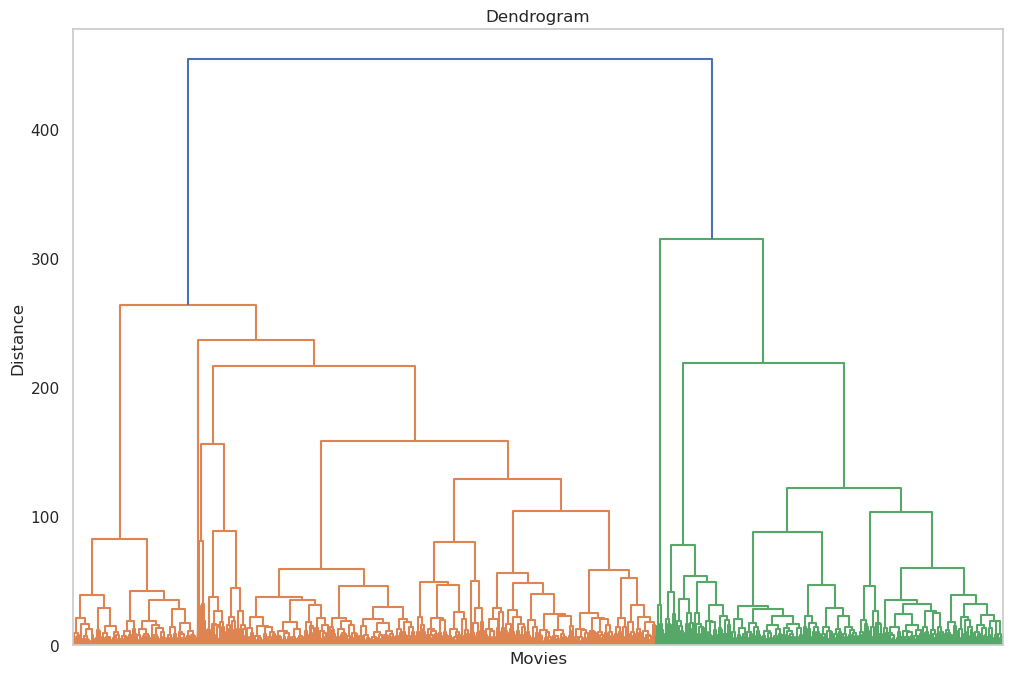

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.figure_factory as ff


df = df_read_for_kmeans.sample(n=50000).copy().reset_index(drop=True)

# Assuming 'isAdult' column is boolean and converting it to integer type
df['isAdult'] = df['isAdult'].astype(int)


scaler = StandardScaler()
numerical_cols = ['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'actor_score', 'actress_score', 'director_score', 'writer_score']
df_scaled = scaler.fit_transform(df[numerical_cols].reset_index(drop=True))



# Generate the linkage matrix
Z = linkage(df_scaled, method='ward')

print(Z.shape)


labels = df['tconst'].tolist()  # Convert to string if not already

plt.figure(figsize=(12, 8))  # Set the figure size as desired
dn = dendrogram(Z, no_labels=True)  # This will remove the labels (index) from x-axis

# Set the title and axis labels
plt.title('Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Distance')

# Set the background color
plt.gca().set_facecolor('white')  # Set the axis background color to white
plt.grid(False)  # Turn off the grid lines
plt.show()
